In [46]:
import pandas as pd
import numpy as np

In [47]:
#loading the data
df = pd.read_csv('Downloads/IRIS.csv',sep=',',names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [48]:
df.head() #to check whether the dataset matches or not

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x = np.array(df.iloc[:, 0:4])
y = np.array(df['class']) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33) 

#here 0.33 implies that the original dataset is divided into two parts and testing set is 33% of the original 

In [50]:
from sklearn.neighbors import KNeighborsClassifier #importing knn classifier
knn=KNeighborsClassifier(n_neighbors=3)

#fitting the model
knn.fit(x_train, y_train)

#we have trained our classifier using training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [51]:
from sklearn.metrics import accuracy_score
#now we predict the response
pred=knn.predict(x_test)

#check the accuracy
print(accuracy_score(y_test, pred))

0.94


we got accuracy of 96 when n=3

In [52]:
#now we plot the graph using k and accuracy 
import matplotlib.pyplot as plt
#we iterate our classifier for different k values and get the accuracy values accordingly
accuracy_values=[] 
for x in range(1,x_train.shape[0]):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    accuracy_values.append([x,accuracy])

In [53]:
#we need to convert it into numpy array
accuracy_values=np.array(accuracy_values)

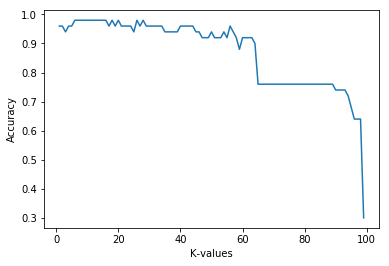

In [54]:
#plotting the graph
plt.plot(accuracy_values[:,0],accuracy_values[:,1])
plt.xlabel("K-values")
plt.ylabel("Accuracy")
plt.show()

Therefore, accuracy drops when k is more than 60